In [1]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

Using TensorFlow backend.
C:\Users\karun\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\karun\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\karun\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\karun\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

In [2]:
train_images.shape

(60000, 28, 28)

In [3]:
train_images.ndim

3

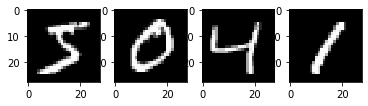

In [4]:
import matplotlib.pyplot as plt
plt.subplot(1,4,1)
plt.imshow(train_images[0], cmap='gray', interpolation='none')
plt.subplot(1,4,2)
plt.imshow(train_images[1], cmap='gray', interpolation='none')
plt.subplot(1,4,3)
plt.imshow(train_images[2], cmap='gray', interpolation='none')
plt.subplot(1,4,4)
plt.imshow(train_images[3], cmap='gray', interpolation='none')

In [5]:
test_images.shape

(10000, 28, 28)

In [6]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [7]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [8]:
from keras import models
from keras import layers
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

In [9]:
network.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])

In [10]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [11]:
train_images.shape

(60000, 784)

In [19]:
train_images[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [12]:
train_images.ndim

2

In [13]:
train_labels.shape

(60000,)

In [14]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
train_labels[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [15]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)


Epoch 1/5
60000/60000 [==============================] - 3s 44us/step - loss: 0.2595 - accuracy: 0.9260
Epoch 2/5
60000/60000 [==============================] - 2s 41us/step - loss: 0.1040 - accuracy: 0.9694
Epoch 3/5
60000/60000 [==============================] - 3s 42us/step - loss: 0.0687 - accuracy: 0.9795
Epoch 4/5
60000/60000 [==============================] - 3s 45us/step - loss: 0.0504 - accuracy: 0.9852
Epoch 5/5
60000/60000 [==============================] - 3s 43us/step - loss: 0.0375 - accuracy: 0.9885


In [16]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

10000/10000 [==============================] - 0s 39us/step


In [17]:
print('test_acc:', test_acc)

test_acc: 0.9812999963760376


In [18]:
# save the model
network.save("Mnist_model")

In [114]:
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(64, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

In [115]:
network.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])

In [116]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

Epoch 1/5
60000/60000 [==============================] - 3s 53us/step - loss: 0.2483 - accuracy: 0.9255
Epoch 2/5
60000/60000 [==============================] - 3s 48us/step - loss: 0.0918 - accuracy: 0.9723
Epoch 3/5
60000/60000 [==============================] - 3s 48us/step - loss: 0.0608 - accuracy: 0.9811
Epoch 4/5
60000/60000 [==============================] - 3s 49us/step - loss: 0.0433 - accuracy: 0.9865
Epoch 5/5
10000/10000 [==============================] - 1s 51us/step
test_acc: 0.9800999760627747


In [6]:
import numpy as np
x = np.array([[[1, 2, 9, 0, 2],
               [8, 9, 3, 9, 0]],
              [[6, 7, 7, 7, 8],
               [4, 0, 0, 3, 6]],
              [[9, 9, 9, 9, 9],
               [3, 3, 3, 3, 3]]
             ])

In [155]:
x.ndim

3

In [156]:
x.shape

(3, 2, 5)

In [157]:
x

array([[[1, 2, 9, 0, 2],
        [8, 9, 3, 9, 0]],

       [[6, 7, 7, 7, 8],
        [4, 0, 0, 3, 6]],

       [[9, 9, 9, 9, 9],
        [3, 3, 3, 3, 3]]])

In [158]:
x = x.reshape(3, 2 * 5)
x

array([[1, 2, 9, 0, 2, 8, 9, 3, 9, 0],
       [6, 7, 7, 7, 8, 4, 0, 0, 3, 6],
       [9, 9, 9, 9, 9, 3, 3, 3, 3, 3]])

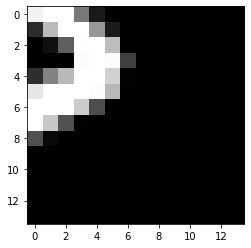

In [162]:
x = train_images[ 0,  14:, 14: ]
plt.imshow(x, cmap='gray', interpolation='none')

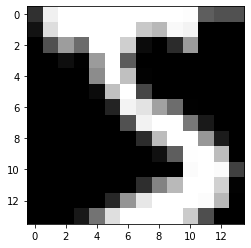

In [163]:
x = train_images[ 0,  7:-7, 7:-7 ]
plt.imshow(x, cmap='gray', interpolation='none')

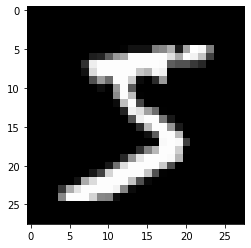

In [164]:
x = train_images[ 0,  :, : ]
plt.imshow(x, cmap='gray', interpolation='none')

In [3]:
x = np.array([[4,5,6], [7,6,1]])
x.shape

(2, 3)

In [4]:
x.reshape(6,1)

array([[4],
       [5],
       [6],
       [7],
       [6],
       [1]])

In [5]:
x.reshape(6)

array([4, 5, 6, 7, 6, 1])

In [7]:
x.shape

(3, 2, 5)

In [9]:
x = np.transpose(x)
x.shape

(5, 2, 3)